In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

# Kinetic inductances definitions

In [4]:
Lk_12 = 12e-12 # For SiTUD20
Lk_24 = 24e-12 # For SiSC10
Lk_232 = 232e-12 # For SiChip5
epsilon_r_Si = 11.9
epsilon_r_Ge = [15.18, 16, 15.18, 16, 11.9]
thickness_subs_Si = 500e-6
thickness_subs_Ge = [50e-9, 20e-9, 600e-9, 300e-9, 600e-6]


# CPW parameters

In [30]:
# 24pH/sq
FeedlineWidth24 = 50.1
FeedlineLength24  = 6200
FeedlineGap24 = 5
FeedlineTaperLength24 =  100
BondpadWidth24 =  230
BondpadLength24 = 200
BondpadGap24 = BondpadWidth24*(FeedlineGap24/FeedlineWidth24)

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24, length_CPW=(FeedlineLength24 + FeedlineTaperLength24 + BondpadLength24)*1e-6)/1e9, 'GHz')


Impedance of the feedline is 50.06035358042184 Ohm
Frequency of the feedline is 5.245261397258707 GHz


In [26]:
# 24pH/sq
FeedlineWidth24 = 100
FeedlineLength24  = 6200
FeedlineGap24 = 45
FeedlineTaperLength24 =  100
BondpadWidth24 =  230
BondpadLength24 = 200
BondpadGap24 = BondpadWidth24*(FeedlineGap24/FeedlineWidth24)

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth24*1e-6, FeedlineGap24*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_24, length_CPW=(FeedlineLength24 + FeedlineTaperLength24 + BondpadLength24)*1e-6)/1e9, 'GHz')


Impedance of the feedline is 50.69547843719545 Ohm
Frequency of the feedline is 6.093220319166452 GHz


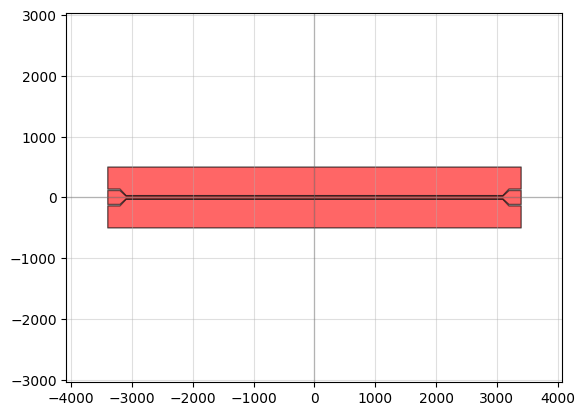

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240527_ResonatorsChipsHighLk\\20240527-SiRes-24pHsq-Tline_thinner.gds'

In [31]:
ChipSize24 = [FeedlineLength24 + 2*BondpadLength24 + 2*FeedlineTaperLength24, 1000]

_, _, TLine24 = ChipTline(ChipSize24,
                          FeedlineWidth24, 
                          FeedlineLength24, 
                          FeedlineGap24, 
                          FeedlineTaperLength24, 
                          BondpadWidth24, 
                          BondpadLength24, 
                          BondpadGap24)
qp(TLine24)
TLine24.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240527_ResonatorsChipsHighLk\20240527-SiRes-24pHsq-Tline_thinner.gds")


In [45]:
# 12pH/sq thicker --> resonance outsde of the band
FeedlineWidth12 = 90
FeedlineLength12  = 6200
FeedlineGap12 = 70
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=12e-12), 'Ohm')
# print('Impedance of the bondpad is', impedance_CPW(BondpadWidth12*1e-6, BondpadGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=12e-12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.79887253683829 Ohm
Frequency of the feedline is 6.411143731400498 GHz


In [50]:
# 12pH/sq thinner 
FeedlineWidth12 = 20
FeedlineLength12  = 6200
FeedlineGap12 = 1
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
# print('Impedance of the bondpad is', impedance_CPW(BondpadWidth12*1e-6, BondpadGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.926688457075116 Ohm
Frequency of the feedline is 4.810843943286727 GHz


In [5]:
# 12pH/sq
FeedlineWidth12 = 30
FeedlineLength12  = 6200
FeedlineGap12 = 5
FeedlineTaperLength12 =  100
BondpadWidth12 =  200
BondpadLength12 = 200
BondpadGap12 = BondpadWidth12*(FeedlineGap12/FeedlineWidth12)

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Impedance of the bondpad is', impedance_CPW(BondpadWidth12*1e-6, BondpadGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth12*1e-6, FeedlineGap12*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_12, length_CPW=(FeedlineLength12 + FeedlineTaperLength12 + BondpadLength12)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.0421104007295 Ohm
Impedance of the bondpad is 35.814509932697 Ohm
Frequency of the feedline is 5.542020901728536 GHz


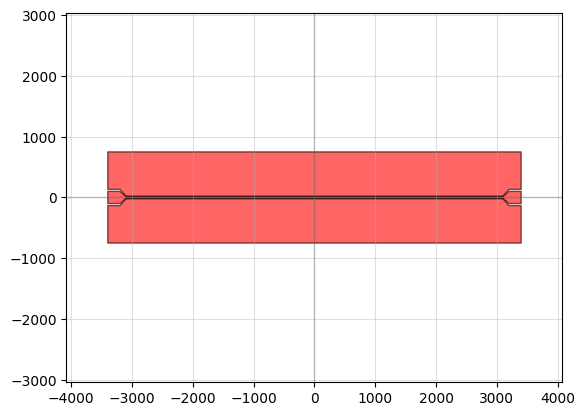

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240527_ResonatorsChipsHighLk\\20240527-SiRes-12pHsq-Tline-corrected.gds'

In [6]:
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1500]

_, _, TLine12 = ChipTline(ChipSize12,
                          FeedlineWidth12, 
                          FeedlineLength12, 
                          FeedlineGap12, 
                          FeedlineTaperLength12, 
                          BondpadWidth12, 
                          BondpadLength12, 
                          BondpadGap12)
qp(TLine12)
TLine12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240527_ResonatorsChipsHighLk\20240527-SiRes-12pHsq-Tline-corrected.gds")


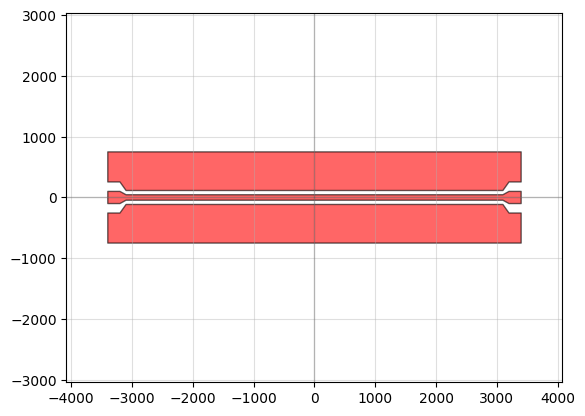

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240527_ResonatorsChipsHighLk\\20240527-SiRes-12pHsq-Tline-thicker.gds'

In [46]:
ChipSize12 = [FeedlineLength12 + 2*BondpadLength12 + 2*FeedlineTaperLength12, 1500]

_, _, TLine12 = ChipTline(ChipSize12,
                          FeedlineWidth12, 
                          FeedlineLength12, 
                          FeedlineGap12, 
                          FeedlineTaperLength12, 
                          BondpadWidth12, 
                          BondpadLength12, 
                          BondpadGap12)
qp(TLine12)
TLine12.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240527_ResonatorsChipsHighLk\20240527-SiRes-12pHsq-Tline-thicker.gds")


In [28]:
# 232pH/sq
FeedlineWidth232 = 330
FeedlineLength232  = 5700
FeedlineGap232 = 5
FeedlineTaperLength232 =  100
BondpadWidth232 =  500
BondpadLength232 = 400
BondpadGap232 = BondpadWidth232*(FeedlineGap232/FeedlineWidth232)

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth232*1e-6, FeedlineGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232), 'Ohm')
print('Impedance of the bondpad is', impedance_CPW(BondpadWidth232*1e-6, BondpadGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth232*1e-6, FeedlineGap232*1e-6, epsilon_r_Si, thickness_subs_Si, ind_kin_sq=Lk_232, length_CPW=(FeedlineLength232 + FeedlineTaperLength232 + BondpadLength232)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.09872776388761 Ohm
Impedance of the bondpad is 42.75399529881796 Ohm
Frequency of the feedline is 4.644803048547639 GHz


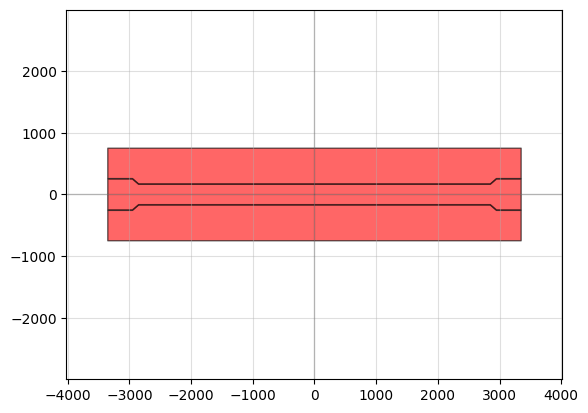

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240527_ResonatorsChipsHighLk\\20240527-SiRes-232pHsq-Tline.gds'

In [29]:
ChipSize232 = [FeedlineLength232 + 2*BondpadLength232 + 2*FeedlineTaperLength232, 1500]

_, _, TLine232 = ChipTline(ChipSize232,
                          FeedlineWidth232, 
                          FeedlineLength232, 
                          FeedlineGap232, 
                          FeedlineTaperLength232, 
                          BondpadWidth232, 
                          BondpadLength232, 
                          BondpadGap232)
qp(TLine232)
TLine232.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240527_ResonatorsChipsHighLk\20240527-SiRes-232pHsq-Tline.gds")


# Resonators list

Inductor total length is [115. 145. 130. 145. 160. 145. 190. 145. 220. 145. 250. 145.]
Resonator 1
 Lg: 44.58327289037888 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 2
 Lg: 56.21316553478278 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 3
 Lg: 50.39821921258083 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 4
 Lg: 56.21316553478278 nH
 Cg: 11.369570742618864 fF
 Cc: 0.2525404356655893 fF
Resonator 5
 Lg: 62.02811185698472 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 6
 Lg: 56.21316553478278 nH
 Cg: 11.369570742618864 fF
 Cc: 0.23817898982213045 fF
Resonator 7
 Lg: 73.65800450138863 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 8
 Lg: 56.21316553478278 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 9
 Lg: 85.28789714579253 nH
 Cg: 11.369570742618864 fF
 Cc: 0.27663352059420543 fF
Resonator 10
 Lg: 56.21316553478278 nH
 Cg: 11.369570742618864 fF
 Cc: 0.2525

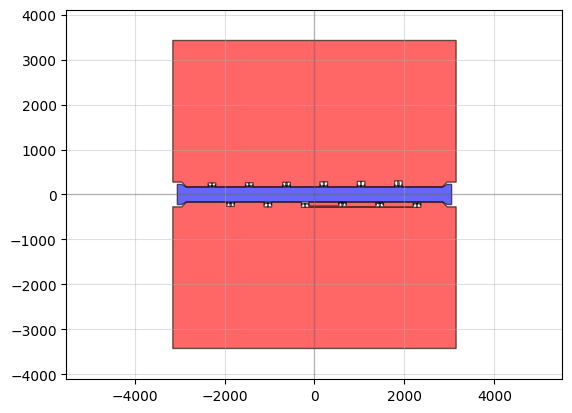

'C:\\Users\\miguelcarrerab\\Documents\\GitHub\\resonators\\gds_files\\20240422_ResonatorsChips\\20240422-12Res-232pHsq.gds'

In [61]:
# 232pH/sq
#Idea: 12 resonators, 6 on each side of the feedline
#The six up have varying inductor length, the six down have varying SpacingCc
SeparationTlineResonator232 = [0]*7 + [5,0,10,0,10]
NumberOfResonators232 = 12

#Resonator parameters
CapacitorHorizontalLength232 = np.ones(NumberOfResonators232)*150
CapacitorVerticalLength232 = np.ones(NumberOfResonators232)*30
CapacitorWidth232 = np.ones(NumberOfResonators232)*5

NumberOfBends232 = np.ones(NumberOfResonators232, dtype=int)*[8,10,9,10,11,10,13,10,15,10, 17, 10]-np.ones(NumberOfResonators232, dtype=int)*3
InductorVerticalLength232 = np.ones(NumberOfResonators232)*5
InductorHorizontalLength232 = np.ones(NumberOfResonators232)*10
InductorEndLength232 = 20*np.ones(NumberOfResonators232)
InductorTotalLength232 = InductorVerticalLength232*(NumberOfBends232+4) + InductorEndLength232 +InductorHorizontalLength232*NumberOfBends232
print('Inductor total length is', InductorTotalLength232)
InductorWidth232 = np.ones(NumberOfResonators232)*0.6
TaperWidth232 = np.ones(NumberOfResonators232)*20

SpacingC0232 = np.ones(NumberOfResonators232)*5
SpacingCc232 = np.ones(NumberOfResonators232)*[10,10,10,20,10,30,10,5,10,10,10,20]
TaperLength232 = np.ones(NumberOfResonators232)*5
FinalSpacingBondpads232 = 100

freqs = []

for i in range(NumberOfResonators232):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth232[i]*1e-6, CapacitorWidth232[i]*1e-6, (SeparationTlineResonator232[i] + FeedlineGap232 + SpacingCc232[i])*1e-6 , FeedlineWidth232*1e-6,
                                            CapacitorVerticalLength232[i]*1e-6, SpacingC0232[i]*1e-6,
                                            InductorWidth232[i]*1e-6, InductorTotalLength232[i]*1e-6, Lk_232,
                                        epsilon_r_Si, thickness_subs_Si)/1e9)                                        

print('The frequencies are', freqs)

ChipSize232 = [FeedlineLength232 + 2*BondpadLength232 + 2*FeedlineTaperLength232 + 2*FinalSpacingBondpads232, np.max(InductorTotalLength232) + 20*FeedlineWidth232]

c, metal, chip232 = ChipResonatorsTline(ChipSize232, NumberOfResonators232, SeparationTlineResonator232,
                        FeedlineWidth232, FeedlineLength232, FeedlineGap232, 
                        FeedlineTaperLength232, BondpadWidth232, BondpadLength232, BondpadGap232,
                        CapacitorHorizontalLength232, CapacitorVerticalLength232, CapacitorWidth232,
                        NumberOfBends232, InductorVerticalLength232, InductorHorizontalLength232, InductorWidth232, InductorEndLength232,
                        TaperWidth232, TaperLength232, SpacingC0232, SpacingCc232,
                        FinalSpacingBondpads232)

qp(chip232)
# chip232.write_gds(r"C:\Users\miguelcarrerab\Documents\GitHub\resonators\gds_files\20240422_ResonatorsChips\20240422-12Res-232pHsq.gds")
